# Discussions

In [3]:
%run "librairies.ipynb"

In [4]:
discussions = pd.read_csv("data/discussions.csv", sep=";")

discussions.count()

Unnamed: 0    3111
_id           3111
closed         544
closed_by      544
created       3111
discussion    3111
extras        1464
subject       3111
title         3111
user          3111
dtype: int64

In [5]:
discussions.head()

,Unnamed: 0,_id,closed,closed_by,created,discussion,extras,subject,title,user
0,0,5566b28754b314fff698bbc2,NaN,NaN,2014-09-17 15:15:44.174,"[{'content': 'téléchargement impossible', 'pos...",NaN,"{'_cls': 'Dataset', '_ref': DBRef('dataset', O...",téléchargement impossible,5419884dc751df2afa6125af
1,1,5566b28754b314fff698bbc3,NaN,NaN,2014-09-18 15:53:41.626,"[{'content': 'lien 404', 'posted_on': datetime...",NaN,"{'_cls': 'Dataset', '_ref': DBRef('dataset', O...",lien 404,534fff48a3a7292c64a77b50
2,2,5566b28754b314fff698bbc4,NaN,NaN,2014-09-19 09:08:07.066,"[{'content': ""par rapport au site du ministère...",NaN,"{'_cls': 'Dataset', '_ref': DBRef('dataset', O...",par rapport au site du ministère (et au doc pd...,534fff42a3a7292c64a7783c
3,3,5566b28754b314fff698bbc8,NaN,NaN,2013-12-18 18:17:31.356,"[{'content': 'Erreur d\'URL sur le document ""P...",NaN,"{'_cls': 'Dataset', '_ref': DBRef('dataset', O...","Erreur d'URL sur le document ""Principaux indic...",534fff40a3a7292c64a7767f
4,4,5566b28754b314fff698bbc9,NaN,NaN,2013-12-18 22:26:47.529,[{'content': 'Le lien pour télécharger les don...,NaN,"{'_cls': 'Dataset', '_ref': DBRef('dataset', O...",Le lien pour télécharger les données ne foncti...,534fff3fa3a7292c64a77653


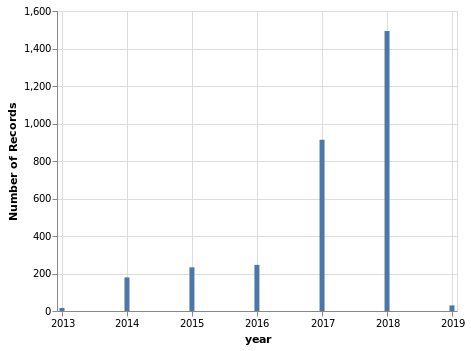

In [6]:
opened = alt.Chart(discussions).mark_bar().encode(
    x="year:T",
    y="count(*):Q"
).transform_timeunit(
    year='year(created)'
)

closed = alt.Chart(discussions[discussions.closed.notna()]).mark_bar().encode(
    x="year:T",
    y="count(*):Q"
).transform_timeunit(
    year='year(closed)'
)

#alt.hconcat(opened, closed)

opened

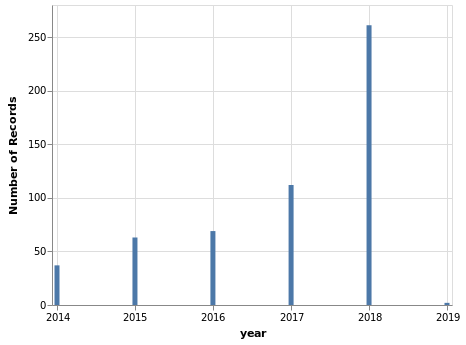

In [7]:
alt.Chart(discussions[discussions.closed.notna()]).mark_bar().encode(
    x="year:T",
    y="count(*):Q"
).transform_timeunit(
    year='year(closed)'
)

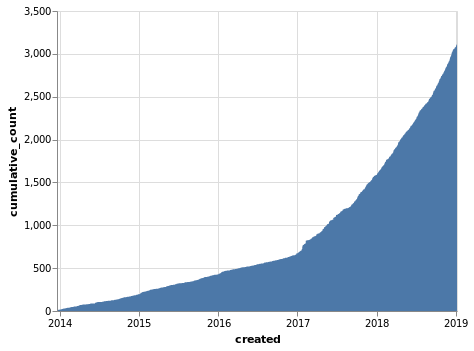

In [16]:
alt.Chart(discussions).mark_area().encode(
    x="created:T",
    y="cumulative_count:Q"
).transform_window(
    window=[{ "op": "count", "field": "count", "as": "cumulative_count"}],
    sort=[{'field': "created"}]
)

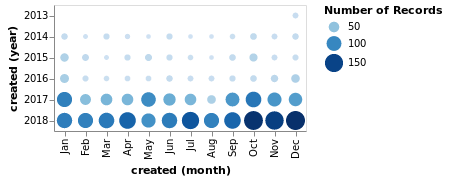

In [8]:
alt.Chart(discussions[(discussions.created <= '2018-12-31')]).mark_circle().encode(
    x= "month(created):O",
    y= "year(created):O",
    size="count(*):Q",
    color="count():Q"
)

## Messages

In [9]:
import json
import datetime
from bson import ObjectId

messages = []

for index, row in discussions.iterrows():
    messages += eval(row["discussion"])

messages = pd.DataFrame(messages)

messages.drop(["content", "posted_by"], axis=1, inplace=True)

messages.head()

,posted_on
0,2014-09-17 15:15:44.174
1,2014-09-18 15:53:41.623
2,2014-09-19 09:08:07.066
3,2013-12-18 18:17:31.356
4,2013-12-18 22:26:47.529


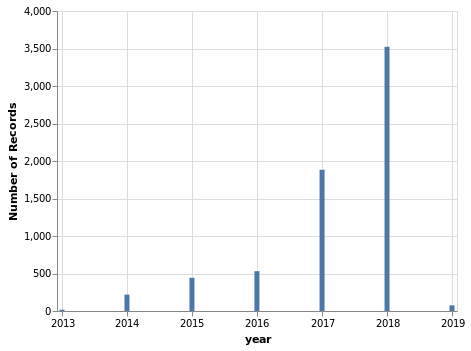

In [10]:
alt.Chart(messages).mark_bar().encode(
    x="year:T",
    y="count(*):Q"
).transform_timeunit(
    year='year(posted_on)'
)

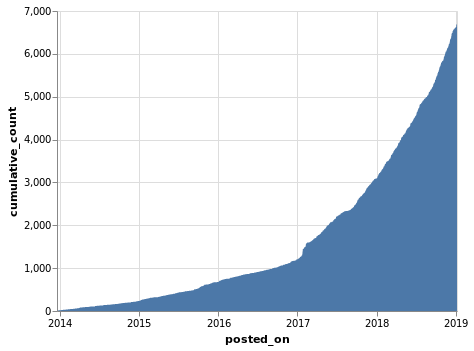

In [17]:
alt.Chart(messages).mark_area().encode(
    x="posted_on:T",
    y="cumulative_count:Q"
).transform_window(
    window=[{ "op": "count", "field": "count", "as": "cumulative_count"}],
    sort=[{'field': "posted_on"}]
)

### 2018

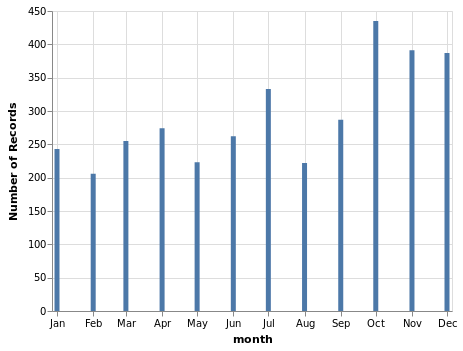

In [11]:
alt.Chart(messages[(messages.posted_on >= '2018-01-01') & (messages.posted_on <= '2018-12-31')]).mark_bar().encode(
    x= alt.X("month:T",
            axis=alt.Axis(format="%b")
        ),
    y="count(*):Q"
).transform_timeunit(
    month='month(posted_on)'
)

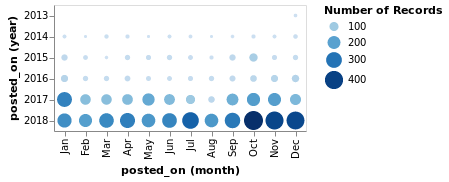

In [12]:
alt.Chart(messages[(messages.posted_on <= '2018-12-31')]).mark_circle().encode(
    x= "month(posted_on):O",
    y= "year(posted_on):O",
    size="count(*):Q",
    color="count():Q"
)

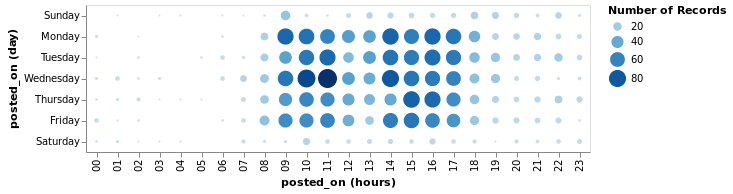

In [13]:
alt.Chart(messages[(messages.posted_on >= '2018-01-01') & (messages.posted_on <= '2018-12-31')]).mark_circle().encode(
    y= "day(posted_on):O",
    x= "hours(posted_on):O",
    size="count(*):Q",
    color="count():Q"
)

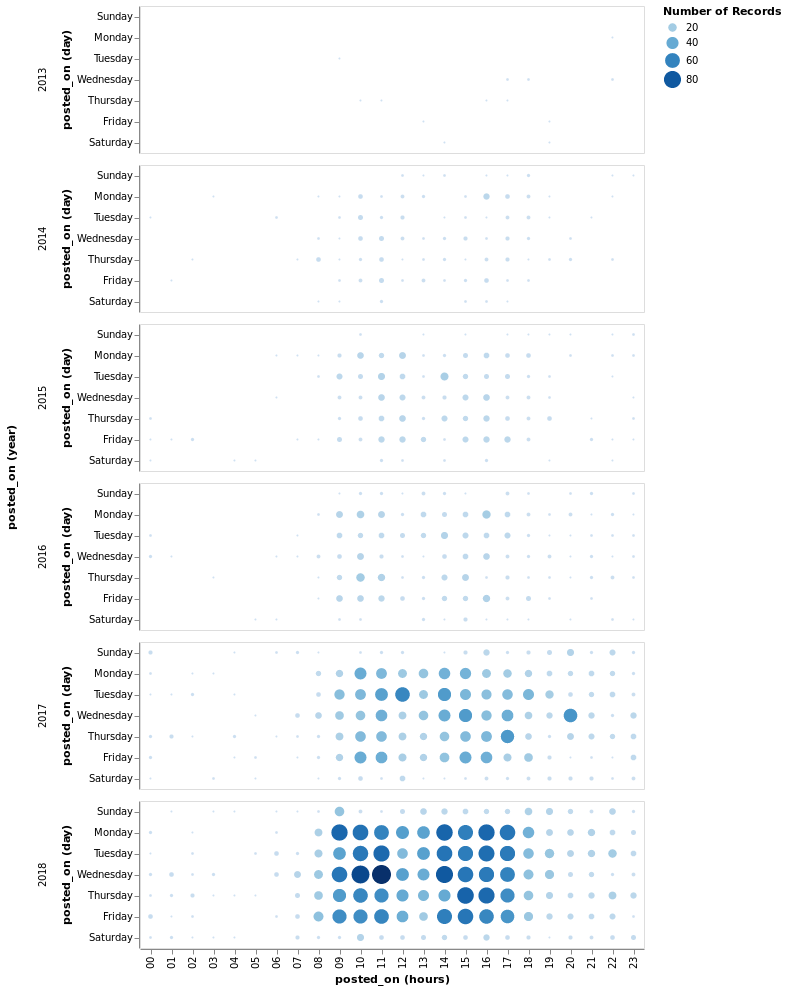

In [14]:
alt.Chart(messages[(messages.posted_on <= '2018-12-31')]).mark_circle().encode(
    y= "day(posted_on):O",
    x= "hours(posted_on):O",
    size="count(*):Q",
    color="count():Q",
    row="year(posted_on):O"
)

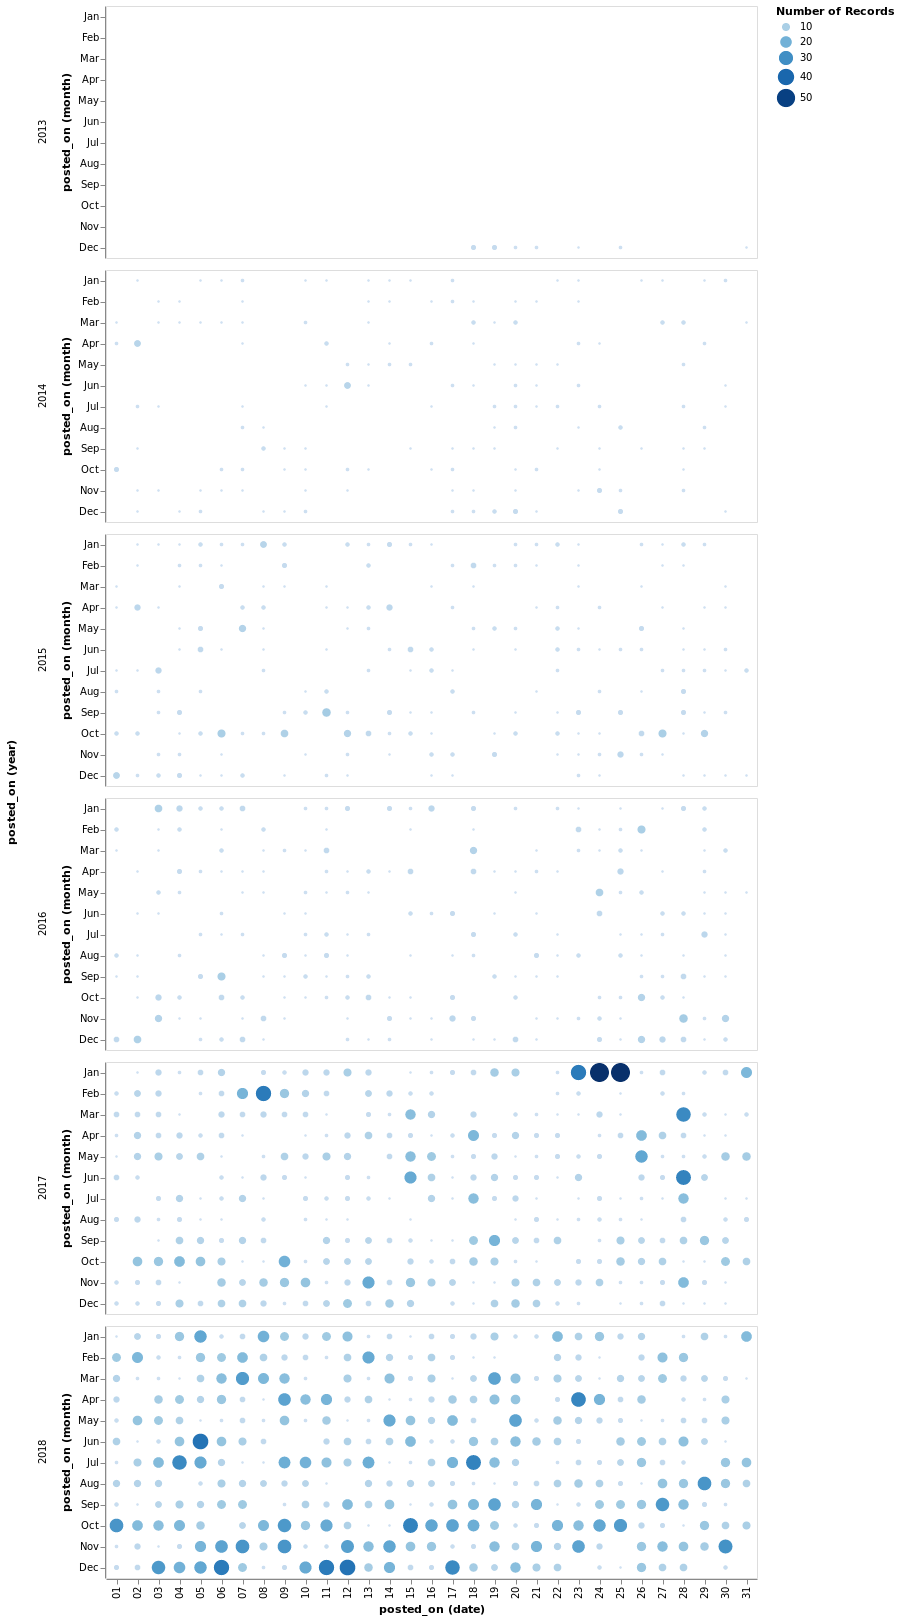

In [15]:
alt.Chart(messages[(messages.posted_on <= '2018-12-31')]).mark_circle().encode(
    y= "month(posted_on):O",
    x= "date(posted_on):O",
    size="count(*):Q",
    color="count():Q",
    row="year(posted_on):O"
)